# 🏘️ Hyderabad Rental Market Analysis  
## Data Cleaning, Analysis, and Visualization


### importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### 1. Importing Data

In [2]:
df=pd.read_csv(r"C:\Users\reddy\innomaticspython\webscrap1.csv")

In [3]:
df.head()

,No_of_Rooms,Unit_Type,Property_Category,Locality,Society_Name,Price_INR,Area_sqft,Furnishing_Status,Has_Pool,Has_Gym,Has_Parking,Has_Lift,Close_to_Hospital,Power_Backup,Kids_Play_Area,Security_24x7
0,4.0,BHK,Independent,Mokila,,"1,50,000",5000,areaSemi furnished,No,No,Yes,No,No,Yes,Yes,No
1,2.0,BHK,Independent,Puppalaguda,,"25,000",1200,areaSemi furnished,No,No,No,No,No,No,No,No
2,3.0,BHK,Independent,Madhapur,,"45,000",2400,areaSemi furnished,No,No,Yes,Yes,No,Yes,No,No
3,3.0,BHK,Independent,Banjara Hills,,"75,000",3200,areaFully furnished,No,No,Yes,No,No,Yes,No,No
4,4.0,BHK,Independent,Rai Durg,,"90,000",3850,areaFully furnished,No,No,Yes,No,No,Yes,No,No


In [4]:
df.shape

(3000, 16)

- Loaded the scraped Hyderabad rental dataset (`webscrap1.csv`) with **3000 entries** and **16 columns**.
- Verified the **first few rows** and **dataset shape**.

### 2. Understanding Columns

In [5]:
df.columns

Index(['No_of_Rooms', 'Unit_Type', 'Property_Category', 'Locality',
       'Society_Name', 'Price_INR', 'Area_sqft', 'Furnishing_Status',
       'Has_Pool', 'Has_Gym', 'Has_Parking', 'Has_Lift', 'Close_to_Hospital',
       'Power_Backup', 'Kids_Play_Area', 'Security_24x7'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   No_of_Rooms        3000 non-null   float64
 1   Unit_Type          3000 non-null   object 
 2   Property_Category  3000 non-null   object 
 3   Locality           3000 non-null   object 
 4   Society_Name       2994 non-null   object 
 5   Price_INR          3000 non-null   object 
 6   Area_sqft          3000 non-null   int64  
 7   Furnishing_Status  3000 non-null   object 
 8   Has_Pool           3000 non-null   object 
 9   Has_Gym            3000 non-null   object 
 10  Has_Parking        3000 non-null   object 
 11  Has_Lift           3000 non-null   object 
 12  Close_to_Hospital  3000 non-null   object 
 13  Power_Backup       3000 non-null   object 
 14  Kids_Play_Area     3000 non-null   object 
 15  Security_24x7      3000 non-null   object 
dtypes: float64(1), int64(1),

- Mix of column types:
  - **Numerical:** `No_of_Rooms`, `Area_sqft`
  - **Categorical:** `Unit_Type`, `Furnishing_Status` , `Has_Pool`, `Has_Gym`, etc.
- `Price_INR` is of type **object** → needs conversion to numeric.

#### Value_counts for categorial

In [7]:
categorical_cols = [
    "No_of_Rooms",
    "Unit_Type",
    "Property_Category",
    "Locality",
    "Society_Name",
    "Furnishing_Status",
    "Has_Pool",
    "Has_Gym",
    "Has_Parking",
    "Has_Lift",
    "Close_to_Hospital",
    "Power_Backup",
    "Kids_Play_Area",
    "Security_24x7"
]


In [8]:
for col in categorical_cols:
    print(f"Value counts for {col}:")
    print(df[col].value_counts())
    print("-"*40)


Value counts for No_of_Rooms:
No_of_Rooms
3.0    1208
2.0     734
1.0     701
4.0     189
2.5     108
3.5      29
5.0      23
6.0       4
4.5       3
1.5       1
Name: count, dtype: int64
----------------------------------------
Value counts for Unit_Type:
Unit_Type
BHK    2933
RK       67
Name: count, dtype: int64
----------------------------------------
Value counts for Property_Category:
Property_Category
Flat           2717
Independent     202
Villa            47
Duplex           17
Penthouse        11
Studio            6
Name: count, dtype: int64
----------------------------------------
Value counts for Locality:
Locality
Kondapur                   745
Madhapur                   215
Kokapet                    179
Financial District         147
Banjara Hills              143
                          ... 
Jeedimetla                   1
Nagole                       1
HMT Colony                   1
Dr A S Rao Nagar Colony      1
Golconda Fort                1
Name: count, Length: 118

#### Initial Observations from Value Counts

- **No_of_Rooms:** Mostly 3BHK (1208), 2BHK (734), 1BHK (701); fractional rooms like 2.5BHK exist but are few.  
- **Unit_Type:** Predominantly BHK (2933), very few RK (67).  
- **Property_Category:** Flats dominate (2717), followed by Independent houses (202); Villas, Duplex, Penthouse, and Studios are rare.  
- **Locality:** Kondapur, Madhapur, and Kokapet are the most common localities; 118 unique localities in total.  
- **Society_Name:** Many missing/empty entries (1705), some popular societies like Rajapushpa Provincia, Prestige High Fields appear.  
- **Furnishing_Status:** Majority are semi-furnished (2071), fully furnished (676), and unfurnished (253).  
- **Amenities:**  
  - Pool: 1029 Yes, 1971 No  
  - Gym: 1053 Yes, 1947 No  
  - Parking: 1774 Yes, 1226 No  
  - Lift: 1512 Yes, 1488 No  
- **Proximity & Facilities:**  
  - Close_to_Hospital: 250 Yes, 2750 No  
  - Power_Backup: 495 Yes, 2505 No  
  - Kids_Play_Area: Very few Yes (19), mostly No (2981)  
- **Security_24x7:** Uniformly No for all entries → not informative.  


### 3.Handling missing values and removing irrelevant columns

In [9]:
df.isnull().sum()

No_of_Rooms          0
Unit_Type            0
Property_Category    0
Locality             0
Society_Name         6
Price_INR            0
Area_sqft            0
Furnishing_Status    0
Has_Pool             0
Has_Gym              0
Has_Parking          0
Has_Lift             0
Close_to_Hospital    0
Power_Backup         0
Kids_Play_Area       0
Security_24x7        0
dtype: int64

- `Society_Name`: 6 missing values + many empty strings → **dropped**.
- `Security_24x7`: uniform (`No` for all) → **dropped**.
- All other columns have **complete values**.


In [10]:
df=df.drop('Society_Name',axis=1)

In [11]:
df=df.drop('Security_24x7',axis=1)

### 4. Handling Duplicates

In [12]:
df.duplicated().sum()

231

In [13]:
df.drop_duplicates(inplace=True)


- Found **231 duplicate rows** → **removed** duplicates.

### 5. Correcting Data Types

In [14]:
df.dtypes

No_of_Rooms          float64
Unit_Type             object
Property_Category     object
Locality              object
Price_INR             object
Area_sqft              int64
Furnishing_Status     object
Has_Pool              object
Has_Gym               object
Has_Parking           object
Has_Lift              object
Close_to_Hospital     object
Power_Backup          object
Kids_Play_Area        object
dtype: object

In [15]:
df["No_of_Rooms"]=df["No_of_Rooms"].astype(int)
    

In [16]:
df["No_of_Rooms"].dtype

dtype('int32')

- `No_of_Rooms`: converted from **float to int** (fractional rooms like 2.5 → 2)

In [17]:
df["Price_INR"]=df["Price_INR"].str.replace(",","").astype(int)

- `Price_INR`: converted from **string with commas to integer**.

In [18]:
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x) 

- Applied `.strip()` to all string (object) columns to remove extra spaces.

In [19]:
counts = df['Locality'].value_counts()
df = df[df['Locality'].isin(counts[counts > 4].index)]

- Kept only localities that have **more than 4 listings**.
- This helps reduce noise from rare localities and ensures meaningful analysis.

In [20]:
df=df[df["Property_Category"]!="Studio"]

- Studios are very few and may skew the analysis, so removing them focuses on Flats, Villas, and other common property types

### ✅ Cleaning Summary
- Dropped **irrelevant/uninformative columns**: `Society_Name`, `Security_24x7`.
- Removed **duplicates**.
- Converted necessary columns to **proper data types**.
- Dataset is now **ready for analysis and visualization**.

### 6. 📊 DATA ANALYSIS AND VISUALIZATION 

#### Summary Statistics

In [21]:
df.describe()

,No_of_Rooms,Price_INR,Area_sqft
count,2661.000000,2661.000000,2661.000000
mean,2.308531,52835.107103,1709.970312
std,0.939464,60748.387999,1160.248696
min,1.000000,5000.000000,150.000000
25%,2.000000,24000.000000,1000.000000
50%,2.000000,40000.000000,1520.000000
75%,3.000000,65000.000000,2063.000000
max,6.000000,1000000.000000,10000.000000


- Observation: The dataset has high variance in price and area due to luxury properties.

In [22]:
df.describe(include='object')

,Unit_Type,Property_Category,Locality,Furnishing_Status,Has_Pool,Has_Gym,Has_Parking,Has_Lift,Close_to_Hospital,Power_Backup,Kids_Play_Area
count,2661,2661,2661,2661,2661,2661,2661,2661,2661,2661,2661
unique,2,5,56,3,2,2,2,2,2,2,2
top,BHK,Flat,Kondapur,areaSemi furnished,No,No,Yes,Yes,No,No,No
freq,2602,2426,698,1819,1789,1766,1563,1332,2428,2215,2646


##### Observation
Most properties are **2–3 BHK flats**, **semi-furnished**, with **parking**,  
but without amenities like **pool**, **gym**, or **kids play area**.  
Rentals are concentrated in specific localities like **Kondapur**.


#### Rent analysis

In [23]:
df['Price_INR'].describe()

count       2661.000000
mean       52835.107103
std        60748.387999
min         5000.000000
25%        24000.000000
50%        40000.000000
75%        65000.000000
max      1000000.000000
Name: Price_INR, dtype: float64

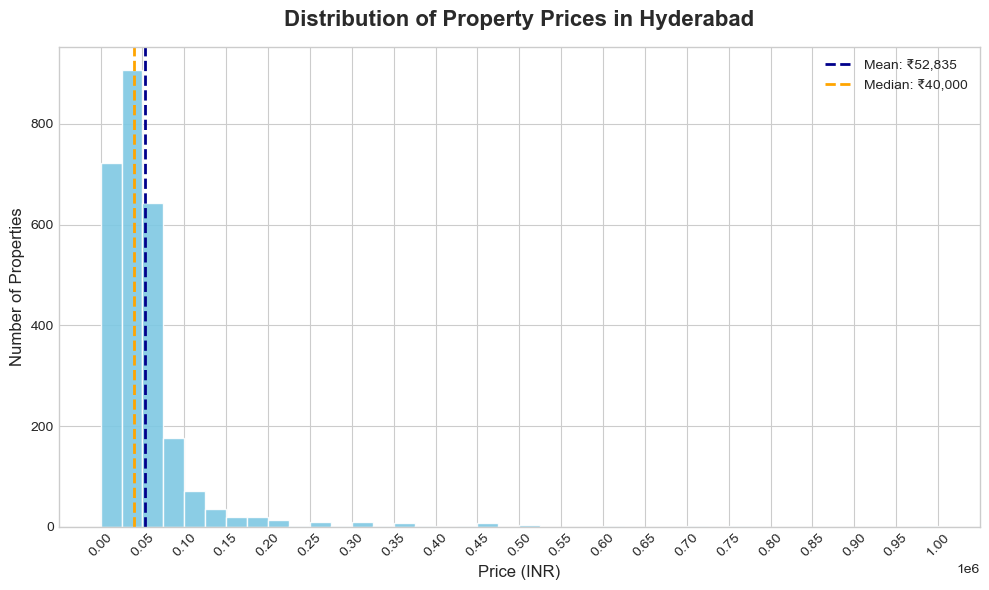

In [24]:
bins = np.arange(0, 1000000 + 25000, 25000)

plt.figure(figsize=(10, 6))
plt.style.use('seaborn-v0_8-whitegrid')

n, bins, patches = plt.hist(df['Price_INR'], bins=bins, color='#7ec8e3', edgecolor='white', alpha=0.9)

plt.axvline(df['Price_INR'].mean(), color='darkblue', linestyle='--', linewidth=2, label=f"Mean: ₹{df['Price_INR'].mean():,.0f}")
plt.axvline(df['Price_INR'].median(), color='orange', linestyle='--', linewidth=2, label=f"Median: ₹{df['Price_INR'].median():,.0f}")

plt.title('Distribution of Property Prices in Hyderabad', fontsize=16, fontweight='bold', color='#2a2a2a', pad=15)
plt.xlabel('Price (INR)', fontsize=12)
plt.ylabel('Number of Properties', fontsize=12)
plt.xticks(bins[::2], rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(frameon=False, fontsize=10)
plt.tight_layout()
plt.show()


- **Range:** ₹5,000 – ₹10,00,000, showing huge variation.  
- **Distribution:** Right-skewed → few luxury properties with very high rents pull the mean up.  
- **Central Tendency:** Mean ₹52,675 > Median ₹40,000, confirming skewness.  
- **Spread:** Std ≈ ₹61,369 → high variability in rents.  
- **Affordable Segment:** Most properties fall between ₹20,000–₹50,000, indicating majority are mid-range or affordable.

##### expensive and cheap properties

In [25]:
df[df['Price_INR']==df['Price_INR'].max()]

,No_of_Rooms,Unit_Type,Property_Category,Locality,Price_INR,Area_sqft,Furnishing_Status,Has_Pool,Has_Gym,Has_Parking,Has_Lift,Close_to_Hospital,Power_Backup,Kids_Play_Area
1085,5,BHK,Duplex,Jubilee Hills,1000000,6500,areaFully furnished,No,No,Yes,No,No,No,No


In [26]:
df.nlargest(5, 'Price_INR')[['Locality','Property_Category','Price_INR','Area_sqft','No_of_Rooms']]



,Locality,Property_Category,Price_INR,Area_sqft,No_of_Rooms
1085,Jubilee Hills,Duplex,1000000,6500,5
2556,Khaja Guda,Villa,750000,6500,4
17,Jubilee Hills,Independent,700000,10000,4
2611,Kokapet,Independent,700000,10000,4
10,Jubilee Hills,Independent,600000,10000,5


- Mostly in **Jubilee Hills** and **Kokapet**.  
- High-end categories: **Duplex, Villa, Independent Houses**.  
- Prices range from ₹6,00,000 – ₹10,00,000 with large areas (6,500 – 10,000 sqft) and 4–5 rooms.  

In [27]:
df[df['Price_INR']==df['Price_INR'].min()]

,No_of_Rooms,Unit_Type,Property_Category,Locality,Price_INR,Area_sqft,Furnishing_Status,Has_Pool,Has_Gym,Has_Parking,Has_Lift,Close_to_Hospital,Power_Backup,Kids_Play_Area
2985,1,RK,Independent,Nallakunta,5000,390,areaUn-furnished,No,No,No,No,Yes,No,No


In [28]:
df.nsmallest(5, 'Price_INR')[['Locality','Property_Category','Price_INR','Area_sqft','No_of_Rooms']]


,Locality,Property_Category,Price_INR,Area_sqft,No_of_Rooms
2985,Nallakunta,Independent,5000,390,1
2274,New Malakpet,Flat,6000,300,1
2861,Nallakunta,Flat,7000,700,1
1069,Ameerpet,Flat,7500,420,1
2273,Habsiguda,Independent,8000,780,1


- Found in **Nallakunta, New Malakpet, Ameerpet, Habsiguda**.  
- Mostly **Flats or small Independent Houses**.  
- Prices range from ₹5,000 – ₹8,000 with small areas (300 – 780 sqft) and 1 room.  


#### Average rent by locality

In [29]:
df.groupby('Locality')['Price_INR'].mean()

Locality
Amberpet                 23300.000000
Ameerpet                 19329.268293
Banjara Hills            86860.622222
Begumpet                 45571.428571
Bolarum                  45100.000000
Borabanda                46723.555556
Financial District       65716.115385
Gachibowli               62754.042254
Gopanapalli              55888.888889
Habsiguda                33548.476190
Hafeezpet                30039.287037
Himayath Nagar           34878.571429
Hitech City              78894.446429
Hyderguda                30600.000000
Jubilee Hills           170581.918367
Kachiguda                32285.714286
Khaja Guda               82312.875000
Kokapet                 109695.080000
Kondapur                 31649.962751
Kothaguda                60251.375000
Kothapet                 27133.333333
Kukatpally               38307.695122
LB Nagar                 37100.000000
Madeenaguda              41833.333333
Madhapur                 39683.000000
Malikdanguda            114111.111111
Man

In [30]:
avg_price = df.groupby('Locality')['Price_INR'].mean()

In [31]:
avg_price.sort_values().head(10)

Locality
Yousufguda              15627.777778
Sanath Nagar            15764.705882
Sanjeeva Reddy Nagar    17350.000000
Ameerpet                19329.268293
Amberpet                23300.000000
Mehdipatnam             24200.000000
Nallakunta              25268.292683
Nacharam                25580.538462
New Malakpet            25600.000000
Kothapet                27133.333333
Name: Price_INR, dtype: float64

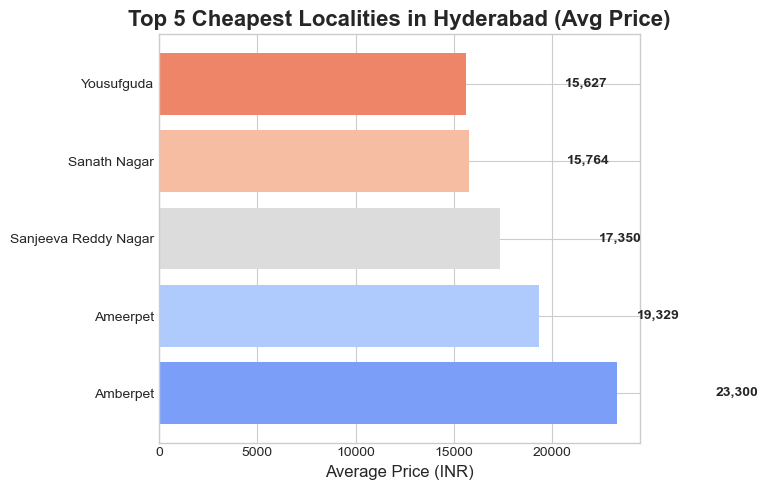

In [36]:
least5_loc = avg_price.sort_values().head(5)
plt.figure(figsize=(8,5))
bars = plt.barh(least5_loc.index[::-1], least5_loc.values[::-1], color=plt.cm.coolwarm(np.linspace(0.2, 0.8, len(least5_loc))))

for bar in bars:
    width = bar.get_width()
    plt.text(width + 5000, bar.get_y() + bar.get_height()/2,
             f"{int(width):,}", va='center', fontweight='bold')

plt.title("Top 5 Cheapest Localities in Hyderabad (Avg Price)", fontsize=16, fontweight='bold')
plt.xlabel("Average Price (INR)", fontsize=12)
plt.tight_layout()
plt.show()



In [37]:
avg_price.sort_values(ascending=False).head(10)

Locality
Rai Durg         202500.555556
Jubilee Hills    170581.918367
Shaikpet         117036.071429
Malikdanguda     114111.111111
Kokapet          109695.080000
Manchirevula     104092.391304
Banjara Hills     86860.622222
Mokila            85666.666667
Khaja Guda        82312.875000
Hitech City       78894.446429
Name: Price_INR, dtype: float64

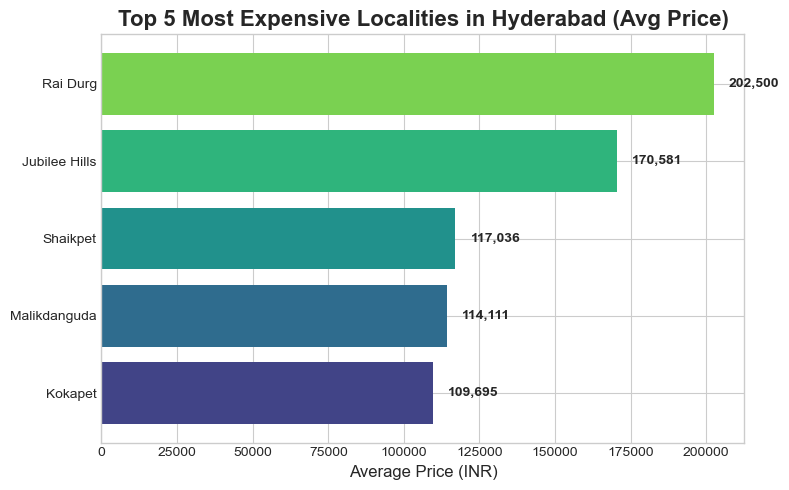

In [39]:

top5_loc = avg_price.sort_values(ascending=False).head(5)

plt.figure(figsize=(8,5))

bars = plt.barh(top5_loc.index[::-1], top5_loc.values[::-1], color=plt.cm.viridis(np.linspace(0.2, 0.8, len(top5_loc))))

for bar in bars:
    width = bar.get_width()
    plt.text(width + 5000, bar.get_y() + bar.get_height()/2,
             f"{int(width):,}", va='center', fontweight='bold')

plt.title("Top 5 Most Expensive Localities in Hyderabad (Avg Price)", fontsize=16, fontweight='bold')
plt.xlabel("Average Price (INR)", fontsize=12)
plt.tight_layout()
plt.show()


#### price per sqft

In [40]:
df['Price_per_sqft'] = df['Price_INR'] / df['Area_sqft']

In [41]:
df['Price_per_sqft'].describe()

count    2661.000000
mean       30.450718
std        41.186058
min         3.833333
25%        21.333333
50%        26.666667
75%        34.285714
max      2000.000000
Name: Price_per_sqft, dtype: float64

In [42]:
avg_price_per_sqft = df.groupby('Locality')['Price_per_sqft'].mean()

In [84]:
avg_price_per_sqft.sort_values().head(5)

Locality
Nagole           3.111111
Rasoolpura       5.000000
Mallampet        9.259259
Peerzadiguda    10.000000
Sainikpuri      10.000250
Name: Price_per_sqft, dtype: float64

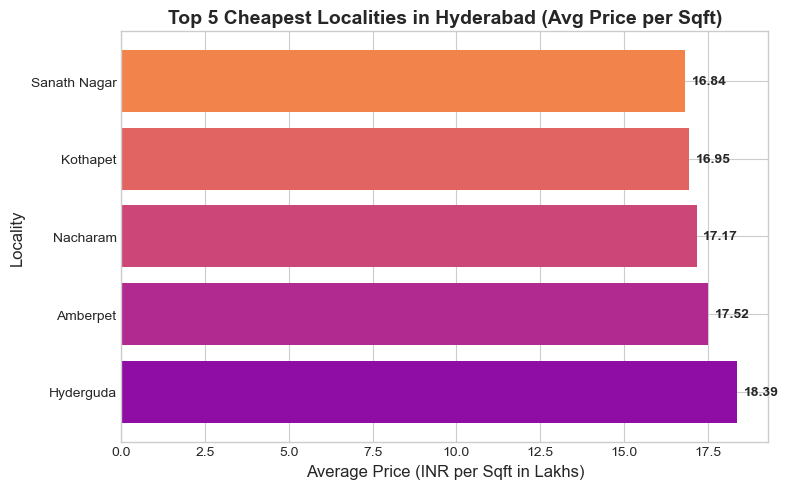

In [58]:

least5_loc = avg_price_per_sqft.sort_values().head(5)

plt.figure(figsize=(8,5))

bars = plt.barh(
    least5_loc.index[::-1],  
    least5_loc.values[::-1],
    color=plt.cm.plasma(np.linspace(0.3, 0.7, len(least5_loc)))
)


for i, value in enumerate(least5_loc.values[::-1]):
    plt.text(value + 0.2, i, f"{value:.2f}", va='center', fontsize=10, fontweight='bold')

plt.title("Top 5 Cheapest Localities in Hyderabad (Avg Price per Sqft)", fontsize=14, fontweight='bold')
plt.xlabel("Average Price (INR per Sqft in Lakhs)", fontsize=12)
plt.ylabel("Locality", fontsize=12)

plt.tight_layout()
plt.show()


In [80]:
avg_price_per_sqft.sort_values(ascending=False).head(5)

Locality
Gandipet         101.351351
Jubilee Hills     81.830275
Karmanghat        75.834176
Sheriguda         69.166667
Rai Durg          61.218154
Name: Price_per_sqft, dtype: float64

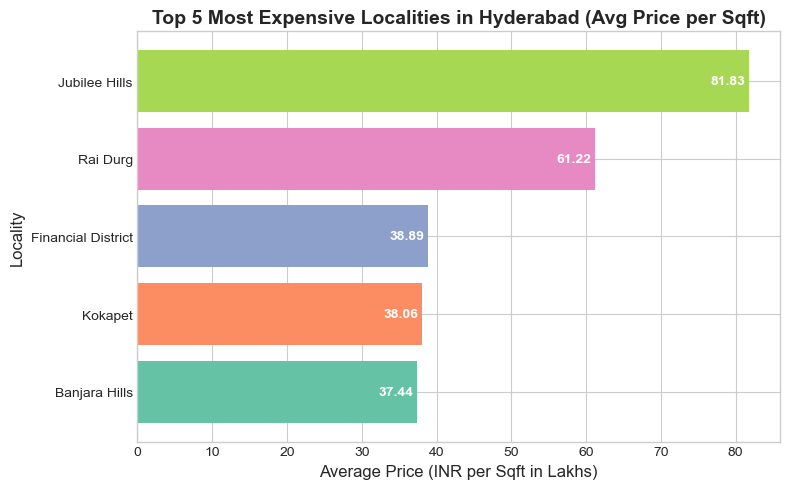

In [60]:

top5_loc = avg_price_per_sqft.sort_values(ascending=False).head(5)

plt.figure(figsize=(8,5))

colors = plt.cm.Set2.colors[:len(top5_loc)]
bars = plt.barh(top5_loc.index[::-1], top5_loc.values[::-1], color=colors)

for i, value in enumerate(top5_loc.values[::-1]):
    plt.text(value - 0.5, i, f"{value:.2f}", va='center', ha='right', color='white', fontsize=10, fontweight='bold')

plt.title("Top 5 Most Expensive Localities in Hyderabad (Avg Price per Sqft)", fontsize=14, fontweight='bold')
plt.xlabel("Average Price (INR per Sqft in Lakhs)", fontsize=12)
plt.ylabel("Locality", fontsize=12)

plt.tight_layout()
plt.show()




#### area vs price by no of rooms

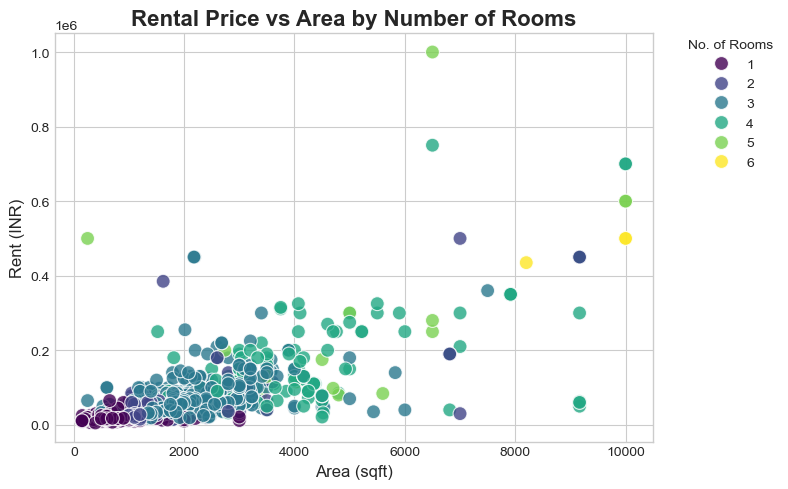

In [66]:
plt.figure(figsize=(8,5))
sns.set_style("whitegrid")  
sns.set_palette("viridis")  

scatter = sns.scatterplot(
    data=df, 
    x="Area_sqft", 
    y="Price_INR", 
    hue="No_of_Rooms", 
    palette="viridis", 
    s=100,  
    edgecolor="w", 
    alpha=0.8
)


plt.title("Rental Price vs Area by Number of Rooms", fontsize=16, weight='bold')
plt.xlabel("Area (sqft)", fontsize=12)
plt.ylabel("Rent (INR)", fontsize=12)
plt.legend(title="No. of Rooms", bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
plt.show()


<Axes: >

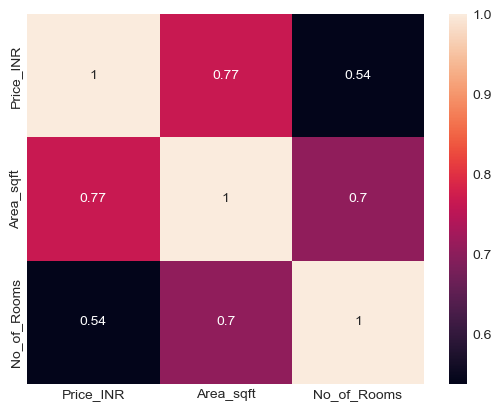

In [68]:
sns.heatmap(df[["Price_INR", "Area_sqft", "No_of_Rooms"]].corr(), annot=True)

In [69]:
df.groupby('No_of_Rooms').agg(
    Avg_Rent=('Price_INR', 'mean'),
    Avg_Area=('Area_sqft', 'mean'),
    Rent_per_sqft=('Price_per_sqft', 'mean')
).reset_index()

,No_of_Rooms,Avg_Rent,Avg_Area,Rent_per_sqft
0,1,19034.107198,747.257274,27.388204
1,2,39033.216689,1387.691790,28.056549
2,3,63412.508788,2102.369103,30.838873
3,4,150076.209877,3955.160494,37.110680
4,5,256157.894737,4716.842105,147.213003
5,6,478333.333333,9400.000000,51.016260


### Observations: Rental Price vs Area by Number of Rooms

- Rent and area **increase with the number of rooms**.  
- 1-room units: Avg rent ~19k, Avg area ~747 sqft, Rent per sqft ~27.4  
- 2-room units: Avg rent ~39k, Avg area ~1,388 sqft, Rent per sqft ~28.1  
- 3-room units: Avg rent ~63k, Avg area ~2,102 sqft, Rent per sqft ~30.8  
- 4-room units: Avg rent ~1.5L, Avg area ~3,955 sqft, Rent per sqft ~37.1  
- 5-room units: Avg rent ~2.56L, Avg area ~4,717 sqft, Rent per sqft ~147.2 (much higher rent per sqft)  
- 6-room units: Avg rent ~4.78L, Avg area ~9,400 sqft, Rent per sqft ~51.0  

**Insights:**  
- Smaller units (1–3 rooms) have **lower rent per sqft**, fairly uniform.  
- 4–6 rooms see **significant jump in rent per sqft**, especially 5-room units (likely premium or luxury properties).  
- Scatter plot shows **wider spread in rent for larger areas**, reflecting high-end properties.


#### Price Summary of Properties by Category



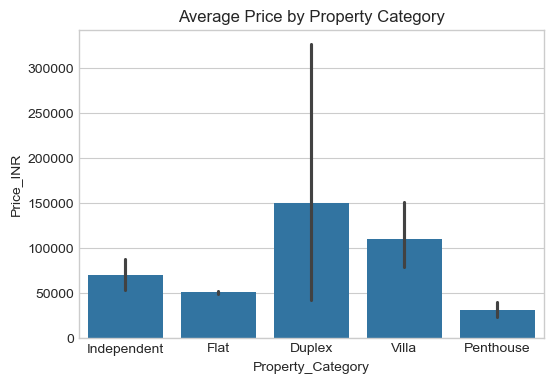

In [76]:
plt.figure(figsize=(6,4))
sns.barplot(data=df, x="Property_Category", y="Price_INR")  
plt.title("Average Price by Property Category")
plt.show()

In [71]:
df.groupby("Property_Category")["Price_INR"].agg(["min","max","mean"])

,min,max,mean
Property_Category,,,
Duplex,30000,1000000,149272.727273
Flat,6000,500000,50323.987222
Independent,5000,700000,69238.544379
Penthouse,11000,55000,30990.818182
Villa,21000,750000,109636.681818


### Observations from Property Price Data

- **Duplexes**: Highest max price (1,000,000) and highest mean price (~149,273), indicating premium properties mostly in this category.  
- **Flats**: Most affordable, with a min price of 6,000 and mean price around 50,324.  
- **Independent Houses**: Mid-range properties, mean price ~69,239, max 700,000.  
- **Penthouses**: Small sample, lower max price (55,000) and mean (~30,991).  
- **Villas**: High-value properties, mean price ~109,637, max 750,000.  


#### Most Common Property Types by Locality


In [72]:
df.groupby("Property_Category")["Locality"].value_counts()

Property_Category  Locality     
Duplex             Banjara Hills    2
                   Kothapet         2
                   Amberpet         1
                   Jubilee Hills    1
                   Madhapur         1
                                   ..
Villa              Nallagandla      1
                   Narayanguda      1
                   Narsingi         1
                   Nizampet         1
                   Shaikpet         1
Name: count, Length: 125, dtype: int64

In [73]:
df.groupby("Property_Category")["Locality"].value_counts().groupby(level=0).head(1)

Property_Category  Locality          
Duplex             Banjara Hills           2
Flat               Kondapur              689
Independent        Kukatpally             47
Penthouse          Financial District      4
Villa              Malikdanguda            5
Name: count, dtype: int64

In [74]:
dfl=df.groupby("Property_Category")["Locality"].value_counts().reset_index()

In [75]:
dfl.drop_duplicates(subset=["Property_Category"], keep="first")

,Property_Category,Locality,count
0,Duplex,Banjara Hills,2
9,Flat,Kondapur,689
64,Independent,Kukatpally,47
97,Penthouse,Financial District,4
104,Villa,Malikdanguda,5


### Observations from Property Data

- Flats are the most common property type, especially in Kondapur (689 properties).  
- Independent houses are more prevalent in Kukatpally (47 properties).  
- Duplexes are mostly found in Banjara Hills (2 properties).  
- Penthouses are concentrated in the Financial District (4 properties).  
- Villas are slightly more in Malikdanguda (5 properties).  


### Ameneties effect on Rent

In [77]:
amenities = ['Has_Pool', 'Has_Gym', 'Has_Parking', 'Has_Lift', 
             'Close_to_Hospital', 'Power_Backup', 'Kids_Play_Area']
rows = []
for amenity in amenities:
    yes_avg = df[df[amenity] == 'Yes']['Price_INR'].mean()
    no_avg = df[df[amenity] == 'No']['Price_INR'].mean()
    rows.append({'Amenity': amenity, 'Yes_Avg_Price': yes_avg, 'No_Avg_Price': no_avg})

avg_price_table = pd.DataFrame(rows)
avg_price_table


,Amenity,Yes_Avg_Price,No_Avg_Price
0,Has_Pool,74799.964450,42128.927334
1,Has_Gym,74430.678212,41890.579275
2,Has_Parking,59684.653871,43084.795993
3,Has_Lift,57823.222222,47835.732129
4,Close_to_Hospital,28663.510730,55154.704283
5,Power_Backup,54822.024664,52435.032506
6,Kids_Play_Area,48153.333333,52861.647770


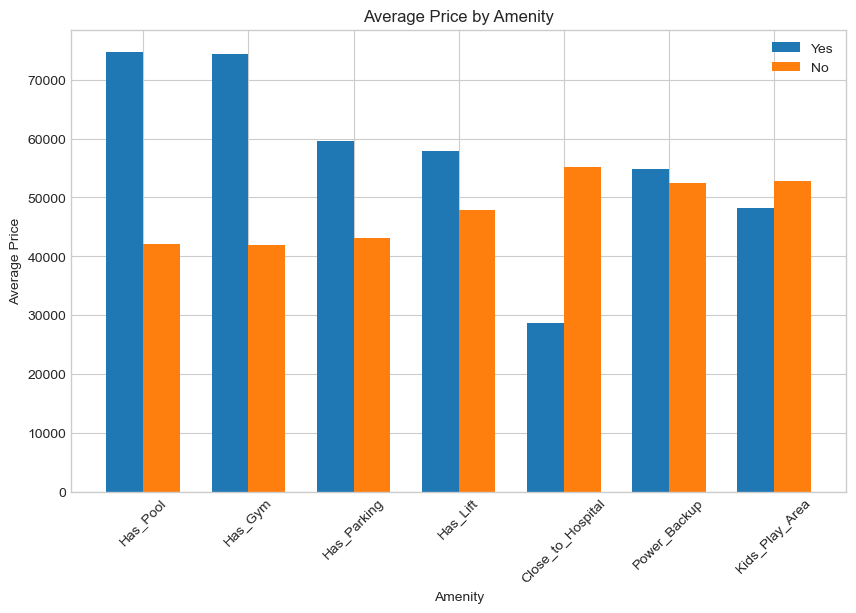

In [78]:
x = np.arange(len(avg_price_table['Amenity']))
width = 0.35 

plt.figure(figsize=(10,6))
plt.bar(x - width/2, avg_price_table['Yes_Avg_Price'], width, label='Yes')
plt.bar(x + width/2, avg_price_table['No_Avg_Price'], width, label='No')

plt.xlabel('Amenity')
plt.ylabel('Average Price')
plt.title('Average Price by Amenity')
plt.xticks(x, avg_price_table['Amenity'], rotation=45)
plt.legend()
plt.show()

**Impact of Amenities on Property Prices:**  

Properties with amenities like **pool, gym, parking, lift, and power backup** generally have higher prices.  
However, being **close to a hospital or having a kids play area** does not always increase the property price.


#### Furnishing effect on rent

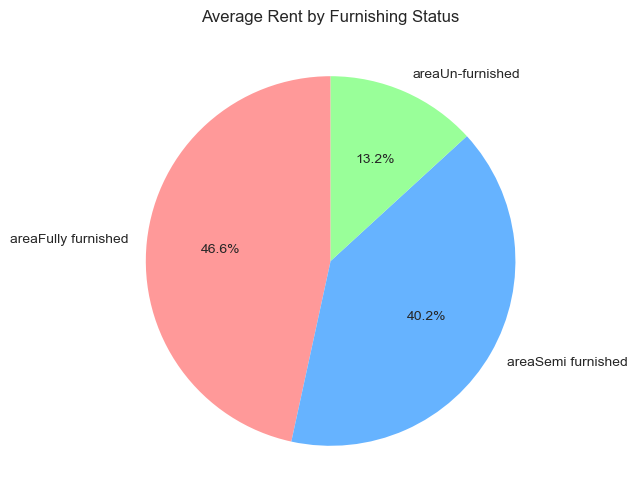

In [79]:
data = df.groupby('Furnishing_Status')['Price_INR'].mean()
plt.figure(figsize=(6,6))
plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Average Rent by Furnishing Status')
plt.show()

**Furnishing Impact on Property Prices:**  

- **Fully furnished:** ~62,778 INR (highest)  
- **Semi-furnished:** ~54,195 INR  
- **Unfurnished:** ~17,774 INR (lowest)  

> Furnishing clearly has a significant impact on property pricing.



### 🏢 KEY BUSINESS INSIGHTS

- **Furnished houses** cost **25–35%** more than unfurnished ones. 
- **Most Expensive & Affordable Localities**:  
  - **Expensive**: Jubilee Hills ,Kokapet , Financial District
  - **Affordable**: Sanath Nagar, Amberpet
- **Impact of Amenities on Rent**:  
  - Flats with **both Gym and Parking** charge **20-25% higher rents**.  
  - Availability of **Power Backup and Lift** increases rent by **10-15%**.  
- **BHK Influence**: **3BHK units** cost **40-50% more** than **2BHK units** on average.  
- **Proximity to IT Hubs**: Localities near **Gachibowli, Madhapur, and Hitech City** show the **highest demand** and **rent per sqft**.  
- **Top Factors Correlated with Rent**:  
  - `Area_sqft`  
  - `No_of_Rooms`


## Conclusions on Hyderabad's Rental Market

- **Key Drivers**: Locality, apartment size, and amenities are the main factors influencing rent.  
- **Premium vs Affordable Areas**:  
  - Premium zones near **IT corridors** command higher rents.  
  - Well-connected **outskirts** provide more affordable options.  
- **Impact of Amenities**: Adding essential amenities and furnishing boosts rental returns.  
- **Most Profitable Segment**: Mid-size, amenity-rich apartments offer the **best returns** for both owners and investors.
